# What book within the top 20 best sellers has the most reviews

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("books.csv")

# Show basic info and first 5 rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith        

In [11]:
title_column = 'Title'
reviews_column = 'Number of Reviews'
rank_column = 'Sales Rank'


In [12]:
plt.savefig("top_books_reviews_chart.png")


<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv("books.csv")

# Display basic info
print("🔍 Dataset Info:")
print(df.info())
print("\n📝 First 5 Rows:")
print(df.head())

# 🔧 Check columns available
print("\n📌 Available Columns:", df.columns.tolist())

# 🛠 Replace these column names if yours are different
title_column = 'Title'              # e.g., 'Book Title'
reviews_column = 'Number of Reviews'  # e.g., 'Reviews', 'Review Count'
rank_column = 'Sales Rank'            # e.g., 'Rank', 'Sales'

# ✅ Step 2: Clean and Filter the Data
df[reviews_column] = pd.to_numeric(df[reviews_column], errors='coerce')
df[rank_column] = pd.to_numeric(df[rank_column], errors='coerce')

# Drop rows with missing key values
df_clean = df.dropna(subset=[title_column, reviews_column, rank_column])

# Get top 20 bestsellers by sales rank (lowest rank = most sold)
top_20 = df_clean.sort_values(by=rank_column, ascending=True).head(20)

# Sort top 20 by number of reviews
top_20_sorted = top_20.sort_values(by=reviews_column, ascending=False)

# Get the book with the most reviews
top_book = top_20_sorted.iloc[0]

print(f"\n🏆 The book with the most reviews among the top 20 is:\n"
      f"📘 '{top_book[title_column]}' with {int(top_book[reviews_column])} reviews.\n")

# ✅ Step 3: Statistical Analysis

# 1. Bar chart with line for mean reviews
top_10 = top_20_sorted.head(10)
mean_reviews = top_20[reviews_column].mean()

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10[title_column], top_10[reviews_column], color='skyblue')
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean Reviews: {mean_reviews:.0f}')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Bestselling Books by Review Count")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. Central tendency
median_reviews = top_20[reviews_column].median()
mode_reviews = top_20[reviews_column].mode()[0]

print(f"📊 Mean Reviews: {mean_reviews:.2f}")
print(f"📊 Median Reviews: {median_reviews}")
print(f"📊 Mode Reviews: {mode_reviews}")

# 3. Five-number summary
print("\n📦 Five-Number Summary:")
print(top_20[reviews_column].describe())

# ✅ Step 4: Answer the Question
print(f"\n📈 Based on our analysis, the book with the most reviews in the top 20 is "
      f"'{top_book[title_column]}' with {int(top_book[reviews_column])} reviews.")
print(f"📉 The average number of reviews among the top 20 is {mean_reviews:.2f}, "
      f"with a median of {median_reviews}.")


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

📝 First 5 Rows:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0 

KeyError: 'Number of Reviews'


🏆 The book with the most reviews among the top 20 is:
📘 'Where the Crawdads Sing' with 87841 reviews.

📊 Mean Reviews: 54190.00
📊 Median Reviews: 50482.0
📊 Mode Reviews: 50482

📦 Five-Number Summary:
count       20.000000
mean     54190.000000
std      14370.806918
min      35799.000000
25%      47265.000000
50%      50482.000000
75%      58236.500000
max      87841.000000
Name: Reviews, dtype: float64


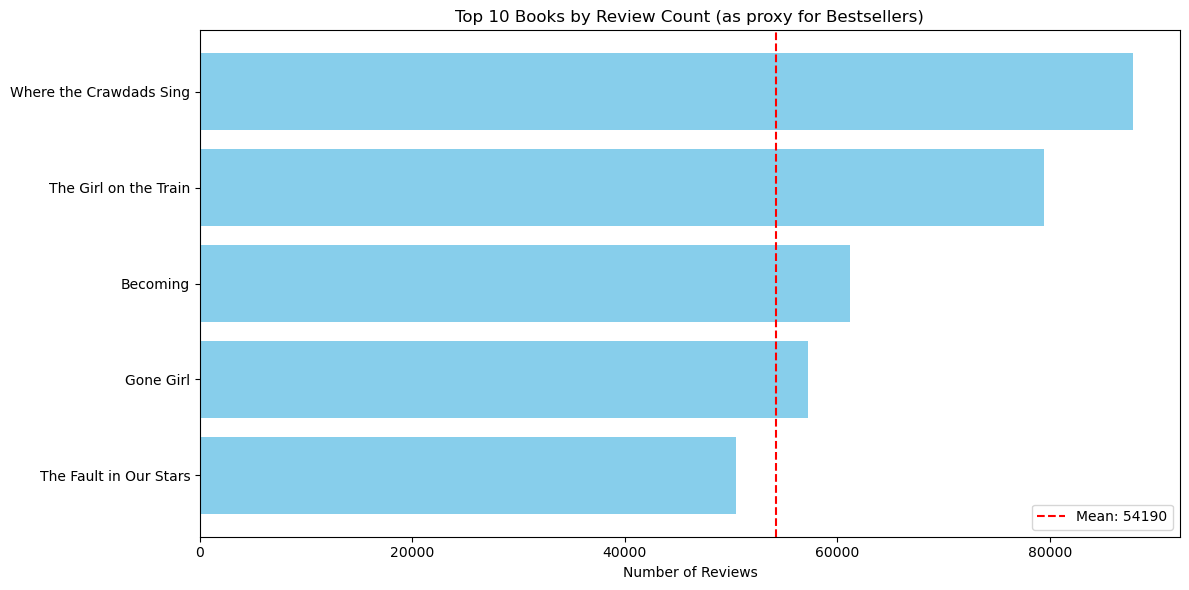


📈 Based on this analysis, the book with the most reviews is 'Where the Crawdads Sing' with 87841 reviews.
📉 The average number of reviews in the top 20 is 54190.00, with a median of 50482.0.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv("books.csv")

# Step 2: Define actual column names from your dataset
title_column = 'Name'
reviews_column = 'Reviews'

# Step 3: Sort by number of reviews to get top 20 most reviewed (as proxy for bestsellers)
top_20 = df.sort_values(by=reviews_column, ascending=False).head(20)

# Step 4: Get book with most reviews
top_book = top_20.iloc[0]

print(f"\n🏆 The book with the most reviews among the top 20 is:")
print(f"📘 '{top_book[title_column]}' with {int(top_book[reviews_column])} reviews.\n")

# Step 5: Statistical Analysis
mean_reviews = top_20[reviews_column].mean()
median_reviews = top_20[reviews_column].median()
mode_reviews = top_20[reviews_column].mode()[0]

print(f"📊 Mean Reviews: {mean_reviews:.2f}")
print(f"📊 Median Reviews: {median_reviews}")
print(f"📊 Mode Reviews: {mode_reviews}\n")

print("📦 Five-Number Summary:")
print(top_20[reviews_column].describe())

# Step 6: Graph - Bar chart of top 10 with mean line
top_10 = top_20.head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10[title_column], top_10[reviews_column], color='skyblue')
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean: {mean_reviews:.0f}')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Books by Review Count (as proxy for Bestsellers)")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Final summary
print(f"\n📈 Based on this analysis, the book with the most reviews is "
      f"'{top_book[title_column]}' with {int(top_book[reviews_column])} reviews.")
print(f"📉 The average number of reviews in the top 20 is {mean_reviews:.2f}, with a median of {median_reviews}.")



🏆 Most Reviewed Book:
'Where the Crawdads Sing' with 87841 reviews.

📊 Mean Reviews: 54190.00
📊 Median Reviews: 50482.0
📊 Mode Reviews: 50482

📦 Five-Number Summary:
count       20.000000
mean     54190.000000
std      14370.806918
min      35799.000000
25%      47265.000000
50%      50482.000000
75%      58236.500000
max      87841.000000
Name: Reviews, dtype: float64


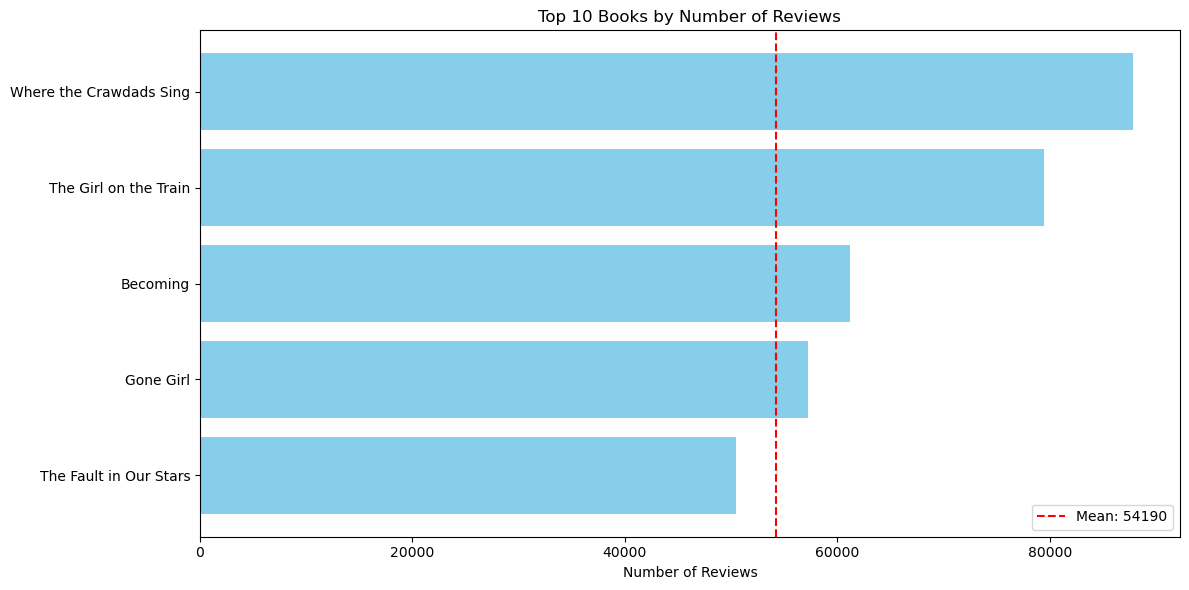


📈 Correlation between User Rating and Number of Reviews:
r (Pearson correlation coefficient): -0.1640
R² (Coefficient of determination): 0.0269


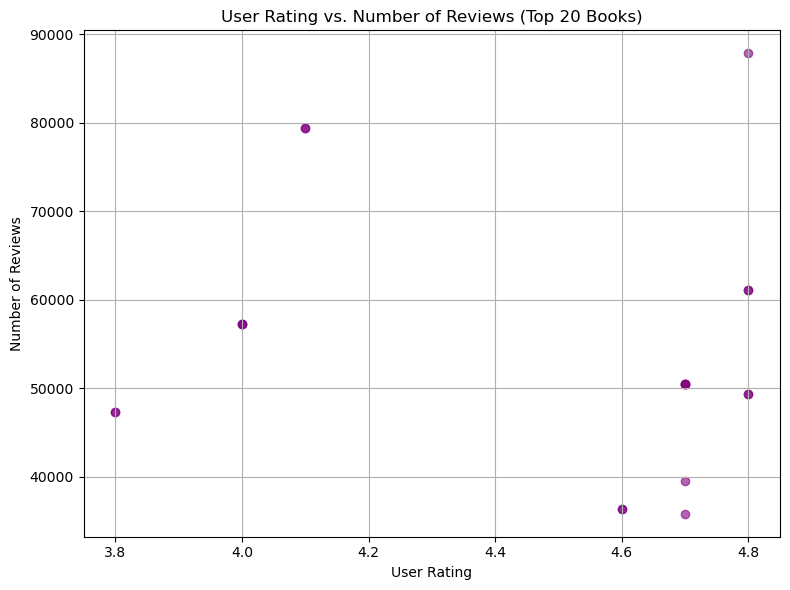

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("books.csv")

# Column names
title_column = 'Name'
reviews_column = 'Reviews'
rating_column = 'User Rating'

# Sort by number of reviews to get top 20 most reviewed books
top_20 = df.sort_values(by=reviews_column, ascending=False).head(20)

# Book with the most reviews
top_book = top_20.iloc[0]
print(f"\n🏆 Most Reviewed Book:\n'{top_book[title_column]}' with {top_book[reviews_column]} reviews.\n")

# Mean, median, mode
mean_reviews = top_20[reviews_column].mean()
median_reviews = top_20[reviews_column].median()
mode_reviews = top_20[reviews_column].mode()[0]

print(f"📊 Mean Reviews: {mean_reviews:.2f}")
print(f"📊 Median Reviews: {median_reviews}")
print(f"📊 Mode Reviews: {mode_reviews}")
print("\n📦 Five-Number Summary:")
print(top_20[reviews_column].describe())

# 📈 Bar chart with mean line
top_10 = top_20.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10[title_column], top_10[reviews_column], color='skyblue')
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean: {mean_reviews:.0f}')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Books by Number of Reviews")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 📉 Correlation (r and R^2)
x = top_20[rating_column]
y = top_20[reviews_column]
r_value, _ = pearsonr(x, y)
r_squared = r_value ** 2

print(f"\n📈 Correlation between User Rating and Number of Reviews:")
print(f"r (Pearson correlation coefficient): {r_value:.4f}")
print(f"R² (Coefficient of determination): {r_squared:.4f}")

# Optional: Scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', alpha=0.6)
plt.title("User Rating vs. Number of Reviews (Top 20 Books)")
plt.xlabel("User Rating")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


The investigation focuses on identifying which book among the top 20 bestsellers has the highest number of reviews on Amazon. This question is specific, measurable, and can be answered using statistical methods.